In [76]:
import pandas as pd
import data_utils
import numpy as np
import importlib
importlib.reload(data_utils)

<module 'data_utils' from 'd:\\Projects\\ComputerVision_CloudSegmentation\\Utilities\\data_utils.py'>

In [3]:
patches,mask = data_utils.get_patch(path_to_folders_images = "../Dataset/Natural_False_Color/", path_to_folders_labels = "../Dataset/Entire_scene_gts/")

c:\Users\GP65\anaconda3\lib\site-packages\rasterio\__init__.py:333: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [4]:
%%timeit
data_utils.fast_image_to_slic(patches[0],mask[0])

66.3 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


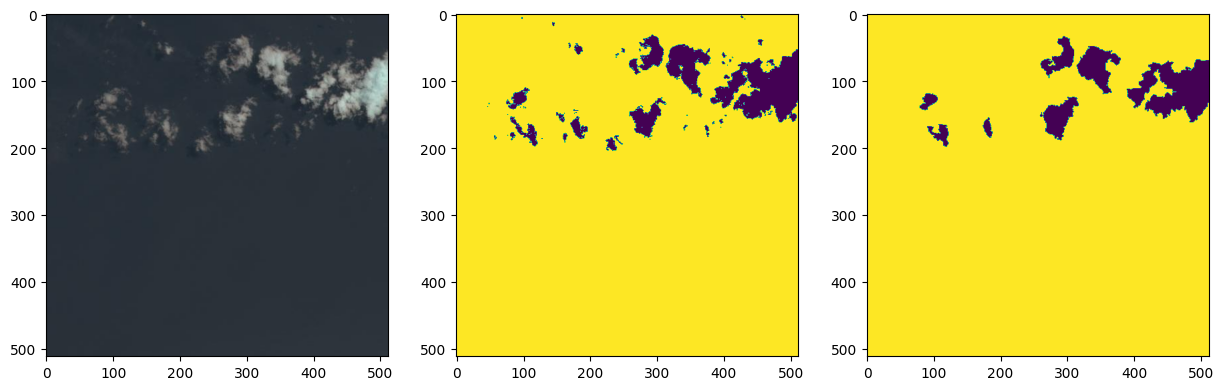

<ipython-input-60-776773d9e661>:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  label = y[[X[:,0] != -1]]


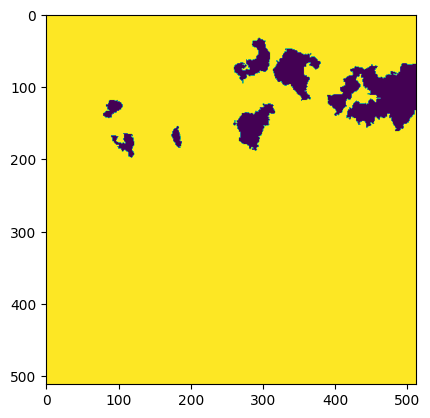

In [77]:
## Plot mask
import matplotlib.pyplot as plt

i = 0

agg, segment = data_utils.fast_image_to_slic(patches[i],mask[i], n_segments=300, compactness=10)
reversed_mask = data_utils.reverse_segmentation(segment,agg['labels'].values,)

## Do the above with subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(patches[i])
axs[1].imshow(mask[i])
axs[2].imshow(reversed_mask)
plt.show()


X_array, y_array, ordering, segments = data_utils.convert_to_xy(patches[i],mask[i])


plt.imshow(data_utils.unpad_and_map(X_array,y_array,ordering,segments))
plt.show()

## Dataset Creation

In [78]:
from tqdm.notebook import tqdm

In [79]:
X = []
y = []
slic_map = []
original_ordering = []

for i,j in tqdm(list(zip(patches,mask))):
    X_array, y_array, ordering, segments = data_utils.convert_to_xy(i,j)
    slic_map.append(segments)
    X.append(X_array)
    y.append(y_array)
    original_ordering.append(ordering)

  0%|          | 0/1472 [00:00<?, ?it/s]

In [46]:
np.save('../Dataset/X.npy', np.array(X))
np.save('../Dataset/Y.npy', np.array(y))
np.save('../Dataset/slic_map.npy', np.array(slic_map))
np.save('../Dataset/original_ordering.npy', np.array(original_ordering))

<ipython-input-46-f5e5f47e34f9>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.save('../Dataset/original_ordering.npy', np.array(original_ordering))


In [40]:
%%timeit
data_utils.convert_to_xy(i,j)

370 ms ± 4.12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
